In [36]:
# Importing the libraries

import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [18]:
# Reading the datasets

store_df = pd.read_csv('../data/store.csv', na_values=['?', None])
test_df = pd.read_csv('../data/test.csv', na_values=['?', None])
train_df = pd.read_csv('../data/train.csv', na_values=['?', None])

### Handling missing values

In [21]:
# Determining which column(s) has missing values (store_df)
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [22]:
# Determining which column(s) has missing values (test_df)
test_df.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [23]:
# Determining which column(s) has missing values (train_df)
train_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

We see that the store dataset has most missing values

In [28]:
# Fixing missing values of store data by 0 and NA

store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna('Not Available')
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna('Not Available')
store_df['PromoInterval'] = store_df['PromoInterval'].fillna('Not Available')
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna('Not Available')
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna('Not Available')

In [29]:
# Confirming missing values (store_df)
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [30]:
# Fixing the missing values in the test data by making all the 3 missing values 0

test_df['Open'] = test_df['Open'].fillna(0)

In [31]:
# Confirming missing values (test_df)
test_df.isna().sum()

Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [34]:
# Merging the train and store datasets

train_store = pd.merge(train_df, store_df, how = 'left', on = "Store")
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,Not Available,Not Available,Not Available
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,Not Available,Not Available,Not Available
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,Not Available,Not Available,Not Available


In [35]:
# # Merging the test and store datasets
test_store = pd.merge(test_df, store_df, how = 'left', on = "Store")
test_store.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,Not Available,Not Available,Not Available
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,Not Available,Not Available,Not Available
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,Not Available,Not Available,Not Available
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,Not Available,Not Available,Not Available


### Checking and Fixing outliers

##### Plot functions

In [38]:
def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

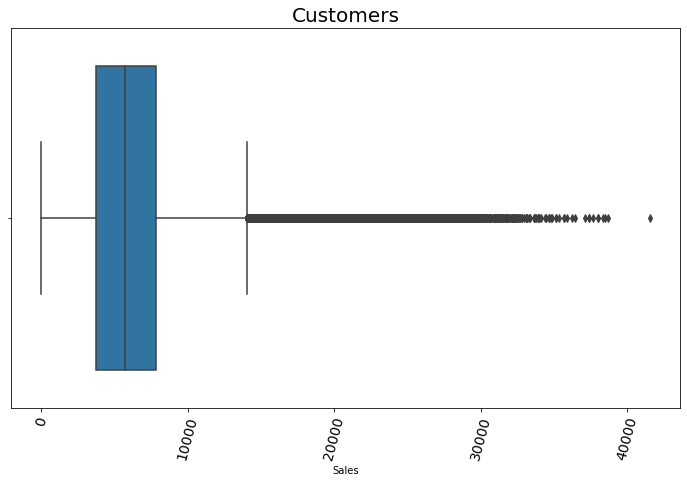

In [40]:
# Checking outliers in train_store data
plot_box(train_store, "Sales", "Customers")

There are outliers in the train_sales dataset.

In [50]:
# Fixing the outliers in the dataset
Q1=train_store['Sales'].quantile(0.25)
Q3=train_store['Sales'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

3650.0
7651.0
4001.0
-2351.5 13652.5


In [53]:
train_clean = train_store[train_store['Sales']< Upper_Whisker]

In [54]:
train_clean.shape

(986834, 18)

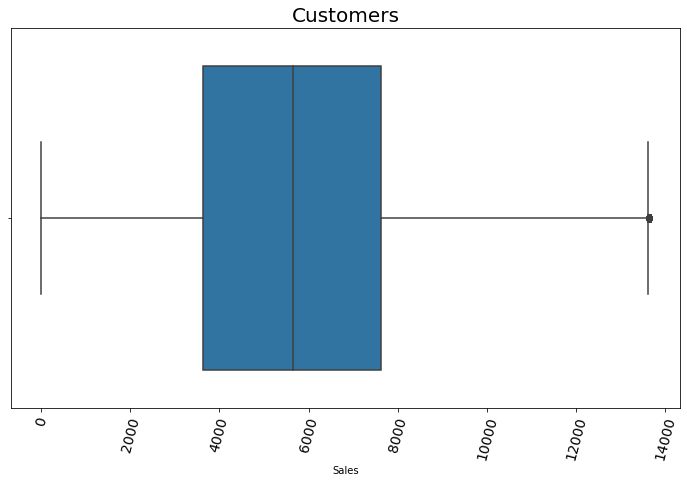

In [55]:
# Checking if outliers have been fixed
plot_box(train_clean, "Sales", "Customers")

In [59]:
# Confirming data is clean
train_clean.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,Not Available,Not Available,Not Available
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,Not Available,Not Available,Not Available
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,Not Available,Not Available,Not Available


In [60]:
# Confirming data is clean
train_clean.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [61]:
# Creating a csv file of train and test store data

test_store.to_csv('../data/test_store.csv',index=False)
train_clean.to_csv('../data/train_store.csv',index=False)